In [16]:
import openmc

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from series.Zernike import Zernike

import math

In [4]:
with openmc.StatePoint('statepoint.20.h5') as sp:
    print(sp.n_realizations)
    print(sp.n_batches)

10
20


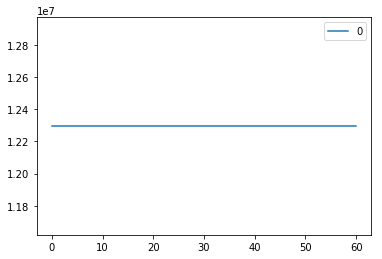

In [95]:
with openmc.StatePoint('statepoint.20.h5') as sp:
    tallies = sp.tallies

kappa = tallies[1].get_slice(scores=['kappa-fission'])

max_order = 0
kappa.mean.shape = (int((max_order + 1) * (max_order + 2) / 2))

zernike_list = [Zernike(order, 0, 0, 60) 
                for order in range(max_order + 1)]

for order in range(max_order + 1):
    n = (order + 1) * (order + 2) // 2
    zernike_list[order].coefficients = kappa.mean[:n]

import numpy as np

r = np.linspace(0, 60, 1000)
z_evals = [np.zeros((r.size)) for zernike in zernike_list]

for r_index, radius in enumerate(r):
    for z_index, zernike in enumerate(zernike_list):
        z_evals[z_index][r_index] = zernike(radius, 0, 
                                            normalization="orthonormal")

for order, z in enumerate(z_evals):
    if order % 2 == 0:
        plt.plot(r, z, label=str(order))
plt.legend()

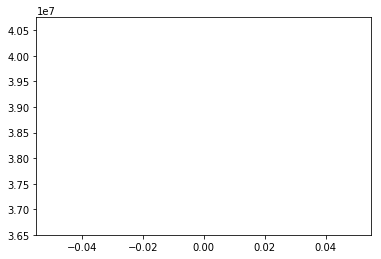

In [88]:
rnorm = np.linspace(0, 1, 1000)

integrated = np.zeros((max_order+1))
for index, zeval in enumerate(z_evals):
    integrated[index] = np.trapz(zeval * rnorm * 2 * math.pi, rnorm)
plt.plot(integrated)    

In [89]:
np.trapz(z_evals[0] * rnorm * 2 * math.pi, rnorm)

38628340.142315626

In [94]:
z_evals[0][0] / 2

6147891.27708462

It seems that as I increase the number of histories, the amount that the kappa-fission integral changes with the order decreases. This is what I would hope for. So I'm 100% confident that the reason the Exodus file in the cylindrical case differs is because a factor of 0.5 is coming from the orthornormal normalization of the Legendre.